# Optimización con scipy

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Ejemplo 1.

Consideremos el siguiente programa:

Minimizar: $\frac{1}{2}(x^2-y^2)$, sujeta a la restricción: $x + \frac{y^2}{2} = 2$

In [3]:
def f(x):
    return (x[0]**2-x[1]**2)/2.0   

(-3.0, 2.0, -3.0, 3.0)

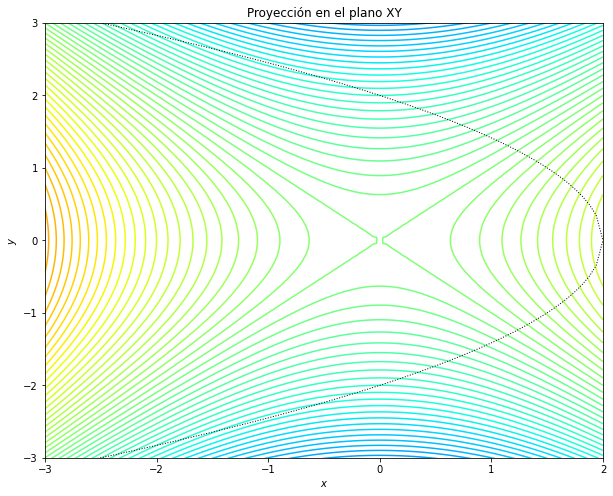

In [4]:
x = np.linspace(-4, 2, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, np.arange(-10,10, 0.2), cmap='jet');
plt.plot(x, np.sqrt(4-2.0*x), 'k:', linewidth=1)
plt.plot(x, -np.sqrt(4-2.0*x), 'k:', linewidth=1)
plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("Proyección en el plano XY")
plt.axis([-3.0,2.0,-3.0,3.0])

In [5]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 0.5*x[1]**2-2.0])})#,
         #'jac' : lambda x: np.array([1.0, 2.0*x[1]])})

bnds = ((-40, 4.0), (-4.0, 4.0))

In [6]:
x0 = [0, 2.5]

In [7]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -537414.9138
 hess_inv: array([[ 1.        ,  0.        ],
       [ 0.        , -0.99999788]])
      jac: array([    0.       , -1036.7421875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 348
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([   0.  , 1036.74])

In [8]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: -2.5000000000010743
     jac: array([-1.00000283, -2.4494912 ])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-0.99999999,  2.44948974])

Trazar los puntos críticos sobre la gráfica.

## Ejemplo 2.

Optimizar la función:
$$-(2xy+2x-x^2-2y^2)$$
sujeta a las restricciones:
$$x^3-y=0$$
$$y-(x-1)^4-2 \geq 0$$
$$0.5 \geq x \geq 1.5$$
$$1.5 \geq y \geq 2.5$$

In [9]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

(0.0, 3.0, 0.0, 3.0)

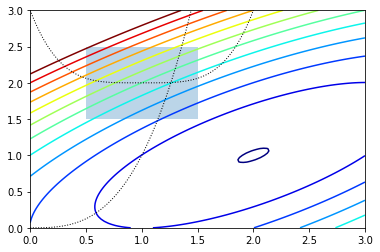

In [10]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])

In [11]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [12]:
x0 = [0, 2.5]

No resdtringida

In [13]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999996365
 hess_inv: array([[0.99829115, 0.50105608],
       [0.50105608, 0.4993548 ]])
      jac: array([ 1.25169754e-06, -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.00000043, 0.99999985])

Con restricciones

In [14]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.049915472024102
     jac: array([-3.48747933,  5.49674535])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

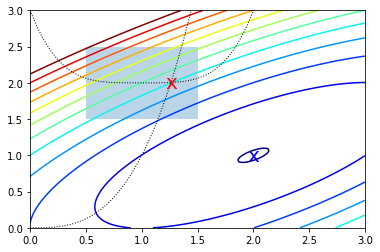

In [15]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);